# Final data and plots for LMPCC

In [1]:
# General 
import sys
import math
from scipy.special import erf
import time
import numpy as np
import pandas as pd
#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.patches import Ellipse
#GPyTorch
import torch
import gpytorch
from torch.utils.data import TensorDataset, DataLoader
from gpytorch.models import ApproximateGP
from gpytorch.variational import CholeskyVariationalDistribution
from gpytorch.variational import VariationalStrategy
import tqdm
#Sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# Constraint checking
def computeEllipseRot(l_1, a, b, c):
    if (b == 0 and a >= c):
        rot = 0
    elif (b == 0 and  a < c):
        rot = 1.57079632679
    else:
        rot = math.atan2(l_1 - a, b)
    return rot
def rotation_matrix(angle):
    return np.array([[np.cos(angle), -np.sin(angle)],
                      [np.sin(angle), np.cos(angle)]])

In [3]:
# Compute the difference to the path 
def path_fit(path_data):
    distances = []
    for j in range(ref_path.shape[0]):
        dist_array = []
        for i in range(path_data[:,0:2].shape[0]):
            dist = math.dist(ref_path[j], path_data[i,0:2])
            dist_array.append(dist)
        min_dist = min(dist_array)
        distances.append(min_dist)
    return np.mean(distances)

In [16]:
def path_fit(ref_path, path_data):
    distances = []
    for j in range(ref_path.shape[0]):
        dist_array = []
        for i in range(path_data[:,0:2].shape[0]):
            dist = math.dist(ref_path[j], path_data[i,0:2])
            dist_array.append(dist)
        min_dist = min(dist_array)
        distances.append(min_dist)
    return np.mean(distances)

## Tracking of the reference path (mean)

In [4]:
x=  np.array([9.5,8.21966, 6.53321, 4.29563, 2.24903, 0.539178, -1.19466, -3.24104, -5.66294, -8.11984, -9.31077, -8.74749, -7.47559, -5.1475, -2.87561, -1.20005, 0.379934, 2.25346, 4.50969, 7.05852, 9.02401])
y=  np.array([0, 1.91088, 2.92557, 2.89586, 1.76999, 0.105575, -1.63442, -3.05593, -3.76148, -3.04584, -0.826043, 1.19589, 2.6498, 3.30992, 2.49388, 0.949599, -0.849726, -2.48293, -3.58324, -3.62231, -1.83893])
psi= [0.015,0.92721,1.6239,2.0641,2.2941,2.3553,2.2601,1.9895,1.4974,0.7456,-0.18984,-1.0739,-1.7224,-2.1202,-2.3171,-2.3497,-2.2249,-1.9178,-1.3796,-0.5832, 0.015,0.92721]

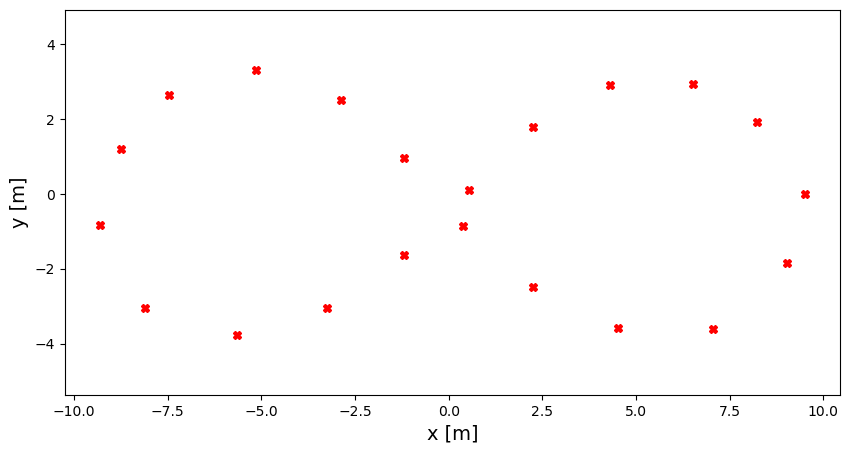

In [5]:
name = None
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.plot(x,y, 'rX')
plt.xlim([-10,10])
plt.ylim([-5,5])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

In [6]:
ref_path = np.vstack([x,y])
ref_path = ref_path.reshape((2,-1)).transpose()
df_ref_path = pd.DataFrame(ref_path, columns = ['x','y'])
df_ref_path.to_csv('/home/johanna/thesis_plots/ref_path.csv')

In [7]:
# Load the path data for xy wind field
path_data = pd.read_csv('/home/johanna/MasterThesis/final_data/path_data/lmpcc_simplesim_no_wind_no_GP_2022-12-29-15-52-15.csv')
path_data_no_wind_no_gp = path_data.to_numpy()
path_data = pd.read_csv('/home/johanna/MasterThesis/final_data/path_data/lmpcc_simplesim_wind_xy_no_GP_2022-12-29-15-59-18.csv')
path_data_wind_xy_no_gp = path_data.to_numpy()
path_data = pd.read_csv('/home/johanna/MasterThesis/final_data/path_data/lmpcc_simplesim_wind_xy_GP_2022-12-29-16-54-27.csv')
path_data_wind_xy_gp = path_data.to_numpy()
path_data = pd.read_csv('/home/johanna/MasterThesis/final_data/path_data/lmpcc_simplesim_tracking_xy_field.csv')
path_data_wind_xy_gp_disc = path_data.to_numpy()

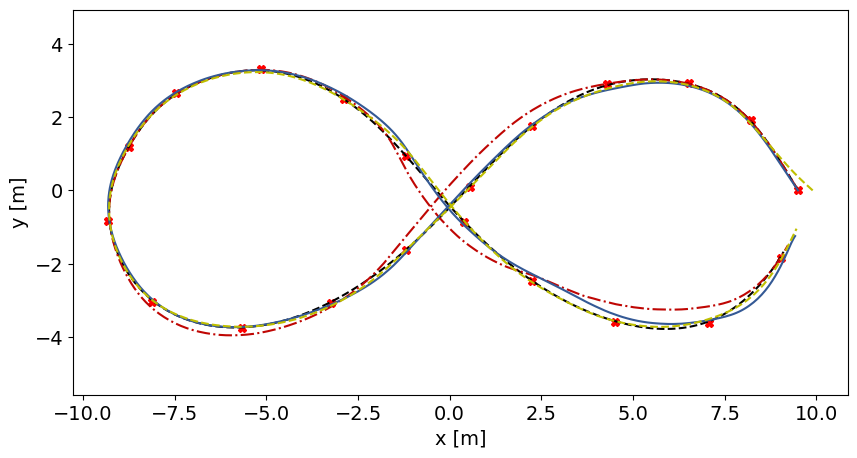

In [8]:
name = None
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.plot(x,y, 'rX')
plt.plot(path_data_no_wind_no_gp[:,0],path_data_no_wind_no_gp[:,1], '--k')
plt.plot(path_data_wind_xy_no_gp[:,0],path_data_wind_xy_no_gp[:,1], '-.', color=(0.74901961, 0.02352941, 0.01176471))
plt.plot(path_data_wind_xy_gp[:,0],path_data_wind_xy_gp[:,1], '-', color=(0.20392157, 0.34901961, 0.58431373))
plt.plot(path_data_wind_xy_gp_disc[:,0],path_data_wind_xy_gp_disc[:,1], '--y')
plt.xlim([-10,10])
plt.ylim([-5,5])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

In [9]:
# Save again to plot data
df_no_wind_no_gp = pd.DataFrame(path_data_no_wind_no_gp[:,0:2], columns = ['x','y'])
df_no_wind_no_gp.to_csv('/home/johanna/thesis_plots/no_wind_no_gp.csv')
df_wind_xy_no_gp = pd.DataFrame(path_data_wind_xy_no_gp[:,0:2], columns = ['x','y'])
df_wind_xy_no_gp.to_csv('/home/johanna/thesis_plots/wind_xy_no_gp.csv')
df_wind_xy_gp = pd.DataFrame(path_data_wind_xy_gp_disc[:,0:2], columns = ['x','y'])
df_wind_xy_gp.to_csv('/home/johanna/thesis_plots/wind_xy_gp.csv')

In [10]:
# Load the path data for x windfield
path_data = pd.read_csv('/home/johanna/MasterThesis/final_data/path_data/lmpcc_simplesim_wind_x_no_GP_2022-12-29-15-56-06.csv')
path_data_wind_x_no_gp = path_data.to_numpy()
path_data = pd.read_csv('/home/johanna/MasterThesis/final_data/path_data/lmpcc_simplesim_wind_x_GP_2022-12-29-16-48-39.csv')
path_data_wind_x_gp = path_data.to_numpy()
path_data = pd.read_csv('/home/johanna/MasterThesis/final_data/path_data/lmpcc_simplesim_tracking_x_field.csv')
path_data_wind_x_gp_disc = path_data.to_numpy()

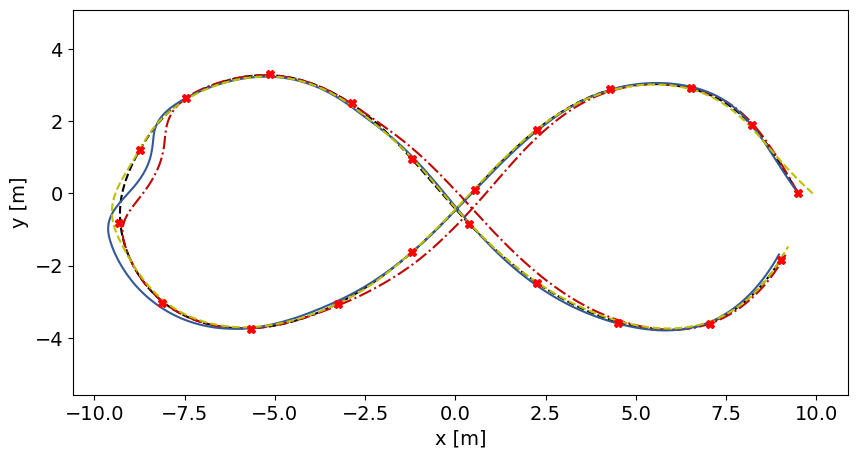

In [11]:
name = None
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.plot(path_data_no_wind_no_gp[:,0],path_data_no_wind_no_gp[:,1], '--k')
plt.plot(path_data_wind_x_no_gp[:,0],path_data_wind_x_no_gp[:,1], '-.', color=(0.74901961, 0.02352941, 0.01176471))
plt.plot(path_data_wind_x_gp[:,0],path_data_wind_x_gp[:,1], '-', color=(0.20392157, 0.34901961, 0.58431373))
plt.plot(path_data_wind_x_gp_disc[:,0],path_data_wind_x_gp_disc[:,1], '--y')
plt.plot(x,y, 'rX')
plt.xlim([-10,10])
plt.ylim([-5,5])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

In [12]:
# Save again to plot data
df_wind_x_no_gp = pd.DataFrame(path_data_wind_x_no_gp[:,0:2], columns = ['x','y'])
#df_wind_x_no_gp.to_csv('/home/johanna/thesis_plots/wind_x_no_gp.csv')
df_wind_x_gp = pd.DataFrame(path_data_wind_x_gp_disc[:,0:2], columns = ['x','y'])
#df_wind_x_gp.to_csv('/home/johanna/thesis_plots/wind_x_gp.csv')

In [17]:
fit_no_wind_no_gp = path_fit(path_data_no_wind_no_gp,path_data_no_wind_no_gp)
fit_wind_x_no_gp = path_fit(path_data_no_wind_no_gp,path_data_wind_x_no_gp)
fit_wind_x_gp = path_fit(path_data_no_wind_no_gp,path_data_wind_x_gp)
fit_wind_x_gp_disc = path_fit(path_data_no_wind_no_gp,path_data_wind_x_gp_disc)
print(fit_no_wind_no_gp, fit_wind_x_no_gp, fit_wind_x_gp, fit_wind_x_gp_disc)

0.0 0.12559227224707278 0.07014439802742745 0.04784674068346162


In [18]:
fit_no_wind_no_gp = path_fit(path_data_no_wind_no_gp,path_data_no_wind_no_gp)
fit_wind_xy_no_gp = path_fit(path_data_no_wind_no_gp,path_data_wind_xy_no_gp)
fit_wind_xy_gp_disc = path_fit(path_data_no_wind_no_gp,path_data_wind_xy_gp_disc)
print(fit_no_wind_no_gp, fit_wind_xy_no_gp, fit_wind_xy_gp_disc)

0.0 0.15006436337676812 0.053489718722096506


## Obstacle avoidance (uncertainty)

### Ellipsoidal constraints

In [ ]:
#Load path and uncertainty from elliposidal constraints
x = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/ec_xy_field/x_mat.csv')
y = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/ec_xy_field/y_mat.csv')
sigma_x = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/ec_xy_field/sigma_x_mat.csv')
sigma_y = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/ec_xy_field/sigma_y_mat.csv')
sigma_xy = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/ec_xy_field/sigma_xy_mat.csv')
slack = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/ec_xy_field/slack_mat.csv')
x = x.to_numpy()
y = y.to_numpy()
sigma_x = sigma_x.to_numpy()
sigma_y = sigma_y.to_numpy()
sigma_xy = sigma_xy.to_numpy()
slack = slack.to_numpy()

In [ ]:
#Show path
%matplotlib notebook
fig, ax = plt.subplots()
ax.scatter(x[:,0], y[:,0])
obst = plt.Circle((0,0), 0.825, color='r')
ax.add_patch(obst)
for i in range(x.shape[0]):
    ax.annotate(i, (x[i,0], y[i,0]))
plt.show()

In [ ]:
for i in range(x.shape[0]):
    for j in range(x.shape[1]):

        variance_x = sigma_x[i,j]
        variance_y = sigma_y[i,j]
        variance_xy = sigma_xy[i,j]

        l_1 = variance_x #(variance_x + variance_y)/2 + np.sqrt(((variance_x - variance_y)/2) **2 + variance_xy ** 2)
        l_2 = variance_y #(variance_x + variance_y)/2 - np.sqrt(((variance_x - variance_y)/2) **2 + variance_xy ** 2)
        rot = variance_xy #computeEllipseRot(l_1, variance_x, variance_xy, variance_y)

        pos = np.array([x[i,j], y[i,j]])
        r_disc = 0.325

        obst_x = 0
        obst_y = 0
        obst_psi = rot
        obst_major = l_1
        obst_minor = l_2
        obst_r = 0.5

        # multiplier for the risk when obst_major, obst_major only denote the covariance
        # (i.e., the smaller the risk, the larger the ellipsoid).
        # This value should already be a multiplier (using exponential cdf).
        chi = 5.991

        # obstacle computations
        obstacle_cog = np.array([obst_x, obst_y])

        disc_to_obstacle = pos - obstacle_cog
        
        obst_major *= np.sqrt(chi)
        obst_minor *= np.sqrt(chi)
        ab = np.array([[1. / ((obst_major + (r_disc + obst_r)) ** 2), 0],
                           [0, 1. / ((obst_minor + (r_disc + obst_r)) ** 2)]])

        # In the original LMPCC paper the angle of the obstacles is defined clockwise
        obstacle_rotation = rotation_matrix(obst_psi)

        obstacle_ellipse_matrix = obstacle_rotation.transpose().dot(ab).dot(obstacle_rotation)

        c_disc_obstacle = disc_to_obstacle.transpose().dot(obstacle_ellipse_matrix).dot(disc_to_obstacle)

        if (c_disc_obstacle < 1):
            if(1-c_disc_obstacle>5e-5): #This is within the solver tolerance
                print("Infeasible constraint detected: ", 1-c_disc_obstacle)
                print("Position", pos)
                print("Iteration i:", i, " j:", j)

In [ ]:
# Plot the unceratinty 
it = 25
%matplotlib notebook
fig, ax = plt.subplots()
obst = plt.Circle((0, 0), 0.5, color='r')
ax.add_patch(obst)
plt.xlim(-2,2)
plt.ylim(-2,2)
chi = 5.991
#for it in (20,21):
for i in range(x.shape[1]):
    ax.annotate(i, (x[it,i], y[it,i]))
# Add the uncertainty ellipse
for i in range(x.shape[1]):
    variance_x =  sigma_x[it,i]
    variance_y =  sigma_y[it,i]
    variance_xy =  sigma_xy[it,i]
    l_1 = variance_x #2*((variance_x + variance_y)/2 + np.sqrt(((variance_x - variance_y)/2)**2 + variance_xy**2)) * 5.991
    l_2 = variance_y #2*((variance_x + variance_y)/2 - np.sqrt(((variance_x - variance_y)/2)**2 + variance_xy**2)) * 5.991
    rot = variance_xy*180/math.pi #computeEllipseRot(l_1, variance_x, variance_xy, variance_y)
    ellipse = Ellipse(xy=(x[it,i], y[it,i]), width= 2*(np.sqrt(chi)*(l_1)+0.325), height= 2*(np.sqrt(chi)*(l_2)+0.325),  angle =rot, edgecolor='r', fc='r', lw=2, alpha=0.2)
    ax.add_patch(ellipse)
ax.scatter(x[it,:], y[it,:], linewidths=0.01)
plt.show()

In [ ]:
#Save the data for plotting
#Path
pos = np.vstack((x[1:,0], y[1:,0])).reshape(2,-1).transpose()
r = 0.325 * np.ones([pos.shape[0],1])
pos_data = np.hstack((pos,r))
df_no_wind_no_gp = pd.DataFrame(pos_data, columns = ['x','y','r'])
df_no_wind_no_gp.to_csv('/home/johanna/thesis_plots/ellipse_path.csv')
#Constraint
i = 25
pos = np.vstack((x[i,:], y[i,:])).reshape(2,-1).transpose()
r1 = (np.sqrt(chi)*sigma_x[i,:]+0.325).reshape(-1,1)
r2 = (np.sqrt(chi)*sigma_y[i,:]+0.325).reshape(-1,1)
rot = sigma_xy[i,:].reshape(-1,1)
pos_data = np.hstack((pos,r1,r2,rot))
df_no_wind_no_gp = pd.DataFrame(pos_data, columns = ['x','y','r1','r2','rot'])
df_no_wind_no_gp.to_csv('/home/johanna/thesis_plots/ellipse_constr.csv')

### Chance constraints

In [ ]:
#Load path and uncertainty from elliposidal constraints
x = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/cc_xy_field/x_mat.csv')
y = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/cc_xy_field/y_mat.csv')
sigma_x = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/cc_xy_field/sigma_x_mat.csv')
sigma_y = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/cc_xy_field/sigma_y_mat.csv')
sigma_xy = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/cc_xy_field/sigma_xy_mat.csv')
slack = pd.read_csv('/home/johanna/MasterThesis/final_data/constraint_data/cc_xy_field/slack_mat.csv')
x = x.to_numpy()
y = y.to_numpy()
sigma_x = sigma_x.to_numpy()
sigma_y = sigma_y.to_numpy()
sigma_xy = sigma_xy.to_numpy()
slack = slack.to_numpy()

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.scatter(x[:,0], y[:,0])
obst = plt.Circle((0,0), 0.825, color='r')
ax.add_patch(obst)
for i in range(x.shape[0]):
    ax.annotate(i, (x[i,0], y[i,0]))
plt.show()

In [ ]:
#Constraint checking
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        pos = np.array([x[i,j], y[i,j]])

        sigma_x_ = sigma_x[i,j]
        sigma_y_ = sigma_y[i,j]
        sigma_xy_ = sigma_xy[i,j]
        
        Sigma = np.array([[sigma_x_, sigma_xy_], [sigma_xy_, sigma_y_]])

        epsilon = 0.05

        r_vehicle = 0.5
        r_obstacle = 0.325
        combined_radius = r_vehicle + r_obstacle
        
        obs_x = 0
        obs_y = 0

        obs_pos = np.array([obs_x, obs_y])
        diff_pos = pos - obs_pos

        a_ij = diff_pos / (np.sqrt(diff_pos.dot(diff_pos)))
        b_ij = combined_radius

        x_erfinv = 1. - 2. * epsilon

    
        z = np.sqrt(-np.log((1.0-x_erfinv) / 2.0))
        y_erfinv = (((1.641345311 * z + 3.429567803) * z - 1.624906493) * z - 1.970840454) / \
                   ((1.637067800 * z + 3.543889200) * z + 1.0)

        y_erfinv = y_erfinv - (erf(y_erfinv) - x_erfinv) / (2.0 / np.sqrt(math.pi) * np.exp(-y_erfinv * y_erfinv))
        y_erfinv = y_erfinv - (erf(y_erfinv) - x_erfinv) / (2.0 / np.sqrt(math.pi) * np.exp(-y_erfinv * y_erfinv))

        constr = a_ij.T @ diff_pos - b_ij - y_erfinv * np.sqrt(2.*a_ij.T @ Sigma @ a_ij)
        if (constr < -5e-5): #Some solver tolerance
            print("Infeasible constraint detected: ", constr)
            print("Position", pos)
            print(y_erfinv * np.sqrt(2.*a_ij.T @ Sigma @ a_ij))
            print("Iteration i:", i, " j:", j)

In [ ]:
#Check slack 
for i in range(slack.shape[0]):
    for j in range(slack.shape[1]):
        if slack[i,j] > 2e-10:
            print (i,j,slack[i,j])

In [ ]:
# Ellipsoidal constraint checking
for i in range(x.shape[0]):
    for j in range(x.shape[1]):                                                       

        variance_x = sigma_x[i,j]
        variance_y = sigma_y[i,j]
        variance_xy = sigma_xy[i,j]

        l_1 = (variance_x + variance_y)/2 + np.sqrt(((variance_x - variance_y)/2) **2 + variance_xy ** 2)
        l_2 = (variance_x + variance_y)/2 - np.sqrt(((variance_x - variance_y)/2) **2 + variance_xy ** 2)
        rot = computeEllipseRot(l_1, variance_x, variance_xy, variance_y)

        pos = np.array([x[i,j], y[i,j]])
        r_disc = 0.5

        obst_x = 0
        obst_y = 0
        obst_psi = rot
        obst_major = np.sqrt(l_1)
        obst_minor = np.sqrt(l_2)
        obst_r = 0.325

        # multiplier for the risk when obst_major, obst_major only denote the covariance
        # (i.e., the smaller the risk, the larger the ellipsoid).
        # This value should already be a multiplier (using exponential cdf).
        chi = 5.991

        # obstacle computations
        obstacle_cog = np.array([obst_x, obst_y])

        disc_to_obstacle = pos - obstacle_cog

        obst_major *= np.sqrt(chi)
        obst_minor *= np.sqrt(chi)
        ab = np.array([[1. / ((obst_major + (r_disc + obst_r)) ** 2), 0],
                           [0, 1. / ((obst_minor + (r_disc + obst_r)) ** 2)]])

        # In the original LMPCC paper the angle of the obstacles is defined clockwise
        obstacle_rotation = rotation_matrix(obst_psi)

        obstacle_ellipse_matrix = obstacle_rotation.transpose().dot(ab).dot(obstacle_rotation)
        
        c_disc_obstacle = disc_to_obstacle.transpose().dot(obstacle_ellipse_matrix).dot(disc_to_obstacle)

        if (c_disc_obstacle < 1):
            if(1-c_disc_obstacle>5e-5): #This is within the solver tolerance
                print("Infeasible constraint detected: ", 1-c_disc_obstacle)
                print("Position", pos)
                print("Iteration i:", i, " j:", j)

In [ ]:
# Plot the unceratinty 
it = 25
%matplotlib notebook
fig, ax = plt.subplots()
obst = plt.Circle((0, 0), 0.5, color='r')
ax.add_patch(obst)
plt.xlim(-2,2)
plt.ylim(-2,2)
for i in range(x.shape[1]):
    ax.annotate(i, (x[it,i], y[it,i]))
# Add the uncertainty ellipse
for i in range(x.shape[1]):
    variance_x =  sigma_x[it,i]
    variance_y =  sigma_y[it,i]
    variance_xy =  sigma_xy[it,i]
    l_1 = (variance_x + variance_y)/2 + np.sqrt(((variance_x - variance_y)/2)**2 + variance_xy**2)
    l_2 = (variance_x + variance_y)/2 - np.sqrt(((variance_x - variance_y)/2)**2 + variance_xy**2)
    rot = computeEllipseRot(l_1, variance_x, variance_xy, variance_y)
    ellipse = Ellipse(xy=(x[it,i], y[it,i]), width= 2*(np.sqrt(chi*l_1)+0.325), height= 2*(np.sqrt(chi*l_2)+0.325), angle = rot*180/math.pi, edgecolor='r', fc='r', lw=2, alpha=0.2)
    ax.add_patch(ellipse)
ax.scatter(x[it,:], y[it,:], linewidths=0.01)
plt.show()

In [ ]:
# Save the data
#Path
pos = np.vstack((x[1:,0], y[1:,0])).reshape(2,-1).transpose()
r = 0.325 * np.ones([pos.shape[0],1])
pos_data = np.hstack((pos,r))
df_no_wind_no_gp = pd.DataFrame(pos_data, columns = ['x','y','r'])
df_no_wind_no_gp.to_csv('/home/johanna/thesis_plots/cc_path.csv')

In [ ]:
#Constraint 
k = 25
pos = np.vstack((x[k,:], y[k,:])).reshape(2,-1).transpose()
r1 = np.sqrt(((sigma_x[k,:] + sigma_y[k,:])/2 + np.sqrt(((sigma_x[k,:] - sigma_y[k,:])/2)**2 + sigma_xy[k,:]**2)) * 5.991)+0.325
r2 = np.sqrt(((sigma_x[k,:] + sigma_y[k,:])/2 - np.sqrt(((sigma_x[k,:] - sigma_y[k,:])/2)**2 + sigma_xy[k,:]**2)) * 5.991)+0.325
rot_arr = [] 
for i in range(x.shape[1]):
    rot_arr.append(computeEllipseRot(l_1, sigma_x[k,i], sigma_xy[k,i], sigma_y[k,i]))
r1 = r1.reshape(-1,1)
r2 = r2.reshape(-1,1)
rot = np.array(rot_arr).reshape(-1,1)
pos_data = np.hstack((pos,r1,r2,rot))
df_no_wind_no_gp = pd.DataFrame(pos_data, columns = ['x','y','r1','r2','rot'])
df_no_wind_no_gp.to_csv('/home/johanna/thesis_plots/cc_constr.csv')

In [ ]:
### Compare propagation outside versus inside
x = pd.read_csv('/home/johanna/MasterThesis/data/chance_constraints/compare/x_mat.csv')
y = pd.read_csv('/home/johanna/MasterThesis/data/chance_constraints/compare/y_mat.csv')
sigma_x = pd.read_csv('/home/johanna/MasterThesis/data/chance_constraints/compare/sigma_x_mat.csv')
sigma_y = pd.read_csv('/home/johanna/MasterThesis/data/chance_constraints/compare/sigma_y_mat.csv')
sigma_xy = pd.read_csv('/home/johanna/MasterThesis/data/chance_constraints/compare/sigma_xy_mat.csv')
x = x.to_numpy()
y = y.to_numpy()
sigma_x = sigma_x.to_numpy()
sigma_y = sigma_y.to_numpy()
sigma_xy = sigma_xy.to_numpy()

In [ ]:
# Compare the uncertainties
fit_list = []
for i in range(54):
    fit = abs((x[i,-1]/1000-sigma_x[i,-1])/sigma_x[i,-1]*100)
    fit_list.append(fit)
#print(fit_list)
print("mean:",np.mean(fit_list[1:]))
print("max:",np.max(fit_list[1:]))

## Robustness

In [ ]:
#Load path and uncertainty from elliposidal constraints
x = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_xy_field/x_mat.csv')
y = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_xy_field/y_mat.csv')
sigma_x = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_xy_field/sigma_x_mat.csv')
sigma_y = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_xy_field/sigma_y_mat.csv')
sigma_xy = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_xy_field/sigma_xy_mat.csv')
slack = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_xy_field/slack_mat.csv')
x = x.to_numpy()
y = y.to_numpy()
sigma_x = sigma_x.to_numpy()
sigma_y = sigma_y.to_numpy()
sigma_xy = sigma_xy.to_numpy()
slack = slack.to_numpy()

In [ ]:
slack_viol_GP = []
slack.shape
for i in range(slack.shape[0]):
    for j in range(slack.shape[1]):
        if(slack[i,j]-2e-10 > 0):
            slack_viol_GP.append(slack[i,j]-2e-10)
print(np.mean(slack_viol_GP))

In [ ]:
name = None
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.scatter(x,y)
obst1 = plt.Circle((0, 0), 0.5+0.325, color='r')
ax.add_patch(obst1)
obst2 = plt.Circle((-2,-2), 0.35+0.325, color='r')
ax.add_patch(obst2)
obst3 = plt.Circle((3,-3), 0.6+0.325, color='r')
ax.add_patch(obst3)
plt.xlim([-10,10])
plt.ylim([-5,5])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

In [ ]:
#Path to plot
pos = np.vstack((x[1:,0], y[1:,0])).reshape(2,-1).transpose()
r = 0.325 * np.ones([pos.shape[0],1])
pos_data = np.hstack((pos,r))
df_no_wind_no_gp = pd.DataFrame(pos_data, columns = ['x','y','r'])
df_no_wind_no_gp.to_csv('/home/johanna/thesis_plots/obstacle_path_GP.csv')

In [ ]:
for i in range(x.shape[0]):
    q = np.array([x[i],y[i]])
    p1 = np.array([0,0])
    r1 = 0.5+0.325
    d1 = math.dist(p1,q)
    p2 = np.array([-2,-2])
    r2 = 0.35+0.325
    d2 = math.dist(p2,q)
    p3 = np.array([3,-3])
    r3 = 0.6+0.325
    d3 = math.dist(p3,q)
    if(d1 < r1 or d2 < r2 or d3 < r3):
        print(q,d1,d2,d3)

In [ ]:
#Load path and uncertainty from elliposidal constraints
x = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/no_GP_xy_field/x_mat.csv')
y = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/no_GP_xy_field/y_mat.csv')
sigma_x = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/no_GP_xy_field/sigma_x_mat.csv')
sigma_y = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/no_GP_xy_field/sigma_y_mat.csv')
sigma_xy = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/no_GP_xy_field/sigma_xy_mat.csv')
slack = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/no_GP_xy_field/slack_mat.csv')
x = x.to_numpy()
y = y.to_numpy()
sigma_x = sigma_x.to_numpy()
sigma_y = sigma_y.to_numpy()
sigma_xy = sigma_xy.to_numpy()
slack = slack.to_numpy()

In [ ]:
name = None
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.scatter(x,y)
obst1 = plt.Circle((0, 0), 0.5+0.325, color='r')
ax.add_patch(obst1)
obst2 = plt.Circle((-2,-2), 0.35+0.325, color='r')
ax.add_patch(obst2)
obst3 = plt.Circle((3,-3), 0.6+0.325, color='r')
ax.add_patch(obst3)
plt.xlim([-10,10])
plt.ylim([-5,5])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

In [ ]:
#Path to plot
pos = np.vstack((x[1:,0], y[1:,0])).reshape(2,-1).transpose()
r = 0.325 * np.ones([pos.shape[0],1])
pos_data = np.hstack((pos,r))
df_no_wind_no_gp = pd.DataFrame(pos_data, columns = ['x','y','r'])
df_no_wind_no_gp.to_csv('/home/johanna/thesis_plots/obstacle_path_no_GP.csv')

In [ ]:
for i in range(x.shape[0]):
    q = np.array([x[i],y[i]])
    p1 = np.array([0,0])
    r1 = 0.5+0.325
    d1 = math.dist(p1,q)
    p2 = np.array([-2,-2])
    r2 = 0.35+0.325
    d2 = math.dist(p2,q)
    p3 = np.array([3,-3])
    r3 = 0.6+0.325
    d3 = math.dist(p3,q)
    if(d1 < r1 or d2 < r2 or d3 < r3):
        print(q,d1-r1,d2-r2,d3-r3)

In [ ]:
slack_viol_no_GP = []
slack.shape
for i in range(slack.shape[0]):
    for j in range(slack.shape[1]):
        if(slack[i,j]-2e-10 > 0):
            slack_viol_no_GP.append(slack[i,j]-2e-10)
print(np.mean(slack_viol_no_GP))

In [ ]:
#Load path and uncertainty from elliposidal constraints
x = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_no_unc_xy_field/x_mat.csv')
y = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_no_unc_xy_field/y_mat.csv')
sigma_x = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_no_unc_xy_field/sigma_x_mat.csv')
sigma_y = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_no_unc_xy_field/sigma_y_mat.csv')
sigma_xy = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_no_unc_xy_field/sigma_xy_mat.csv')
slack = pd.read_csv('/home/johanna/MasterThesis/final_data/robust_data/GP_no_unc_xy_field/slack_mat.csv')
x = x.to_numpy()
y = y.to_numpy()
sigma_x = sigma_x.to_numpy()
sigma_y = sigma_y.to_numpy()
sigma_xy = sigma_xy.to_numpy()
slack = slack.to_numpy()

In [ ]:
name = None
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.scatter(x,y)
obst1 = plt.Circle((0, 0), 0.5+0.325, color='r')
ax.add_patch(obst1)
obst2 = plt.Circle((-2,-2), 0.35+0.325, color='r')
ax.add_patch(obst2)
obst3 = plt.Circle((3,-3), 0.6+0.325, color='r')
ax.add_patch(obst3)
plt.xlim([-10,10])
plt.ylim([-5,5])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

In [ ]:
for i in range(x.shape[0]):
    q = np.array([x[i],y[i]])
    p1 = np.array([0,0])
    r1 = 0.5+0.325
    d1 = math.dist(p1,q)
    p2 = np.array([-2,-2])
    r2 = 0.35+0.325
    d2 = math.dist(p2,q)
    p3 = np.array([3,-3])
    r3 = 0.6+0.325
    d3 = math.dist(p3,q)
    if(d1 < r1 or d2 < r2 or d3 < r3):
        print(q,d1,d2,d3)

## Timing

In [2]:
import json
f = open('/home/johanna/MasterThesis/final_data/timing/lmpcc_profiler_GP.json')
data_GP = json.load(f)
f = open('/home/johanna/MasterThesis/final_data/timing/test/lmpcc_profiler.json')
data_no_GP = json.load(f)

In [3]:
control_loop_time_GP = []
optimization_time_GP = []
for i in data_GP['traceEvents']:
    if(i['name']=="Control Loop"):
        control_loop_time_GP.append(i['dur'])
    if(i['name']=="Optimization"):
        optimization_time_GP.append(i['dur'])
control_loop_time_GP = np.array(control_loop_time_GP)
optimization_time_GP = np.array(optimization_time_GP)

In [4]:
control_loop_time_no_GP = []
optimization_time_no_GP = []
for i in data_no_GP['traceEvents']:
    if(i['name']=="Control Loop"):
        control_loop_time_no_GP.append(i['dur'])
    if(i['name']=="Optimization"):
        optimization_time_no_GP.append(i['dur'])
control_loop_time_no_GP = np.array(control_loop_time_no_GP)
optimization_time_no_GP = np.array(optimization_time_no_GP)

In [5]:
ctrl_med_GP = np.median(control_loop_time_GP)
optim_med_GP = np.median(optimization_time_GP)
ctrl_med_no_GP = np.median(control_loop_time_no_GP)
optim_med_no_GP = np.median(optimization_time_no_GP)
ctrl_max_GP = np.max(control_loop_time_GP)
optim_max_GP = np.max(optimization_time_GP)
ctrl_max_no_GP = np.max(control_loop_time_no_GP)
optim_max_no_GP = np.max(optimization_time_no_GP)

In [6]:
print(ctrl_med_GP, optim_med_GP, ctrl_med_no_GP, optim_med_no_GP)
print(ctrl_max_GP, optim_max_GP, ctrl_max_no_GP, optim_max_no_GP)

108952.0 61197.0 99175.5 76233.0
236067 215372 183101 176210


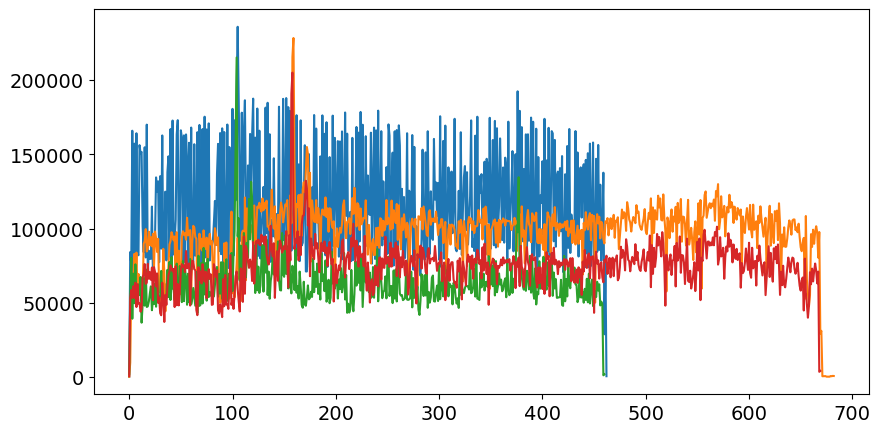

In [40]:
name = None
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.plot(control_loop_time_GP)
ax.plot(control_loop_time_no_GP)
ax.plot(optimization_time_GP)
ax.plot(optimization_time_no_GP)
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

## Forces

In [91]:
x_path = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data/x_path_mat.csv')
y_path = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data/y_path_mat.csv')
x_path = x_path.to_numpy()
y_path = y_path.to_numpy()

In [92]:
for i in range(y_path.shape[0]):
    for j in range(y_path.shape[1]):
        if y_path[i,j] < 1e-5 and y_path[i,j] > -1e-5:
            x_path[i,j] = float('nan')
            y_path[i,j] = float('nan')

In [93]:
x = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data/x.csv')
y = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data/y.csv')
x = np.array(x)
y = np.array(y)

<IPython.core.display.Javascript object>


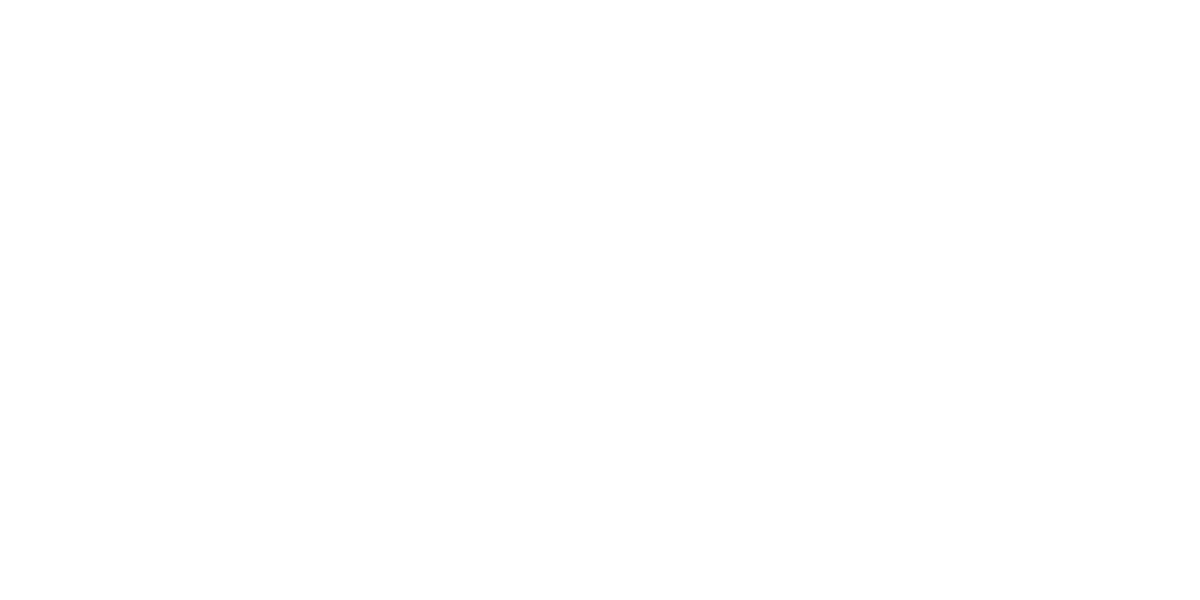

In [94]:
%matplotlib notebook
name = None
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.scatter(x[305:465],y[305:465])
obst1 = plt.Circle((-0.5, -2), 0.25, color='r')
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, color='r')
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, color='r')
ax.add_patch(obst3)
for j in range(60,108):
    plt.plot(x_path[j,:], y_path[j,:], '--', color='0.6')
    plt.plot(x_path[j,0], y_path[j,0], 'k*')
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

<IPython.core.display.Javascript object>


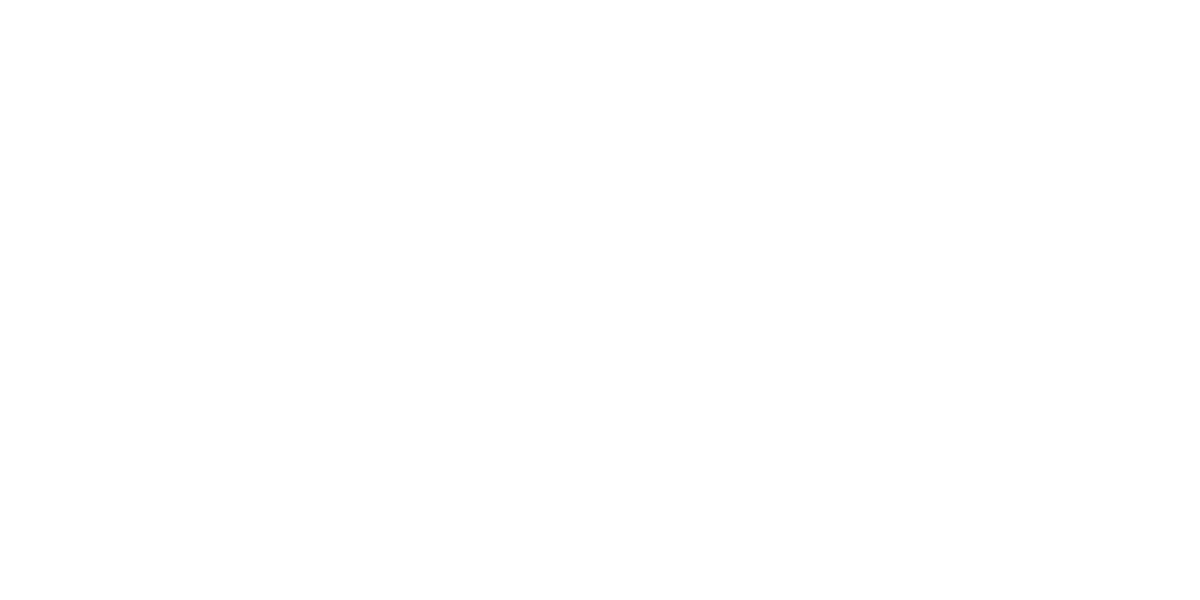

In [95]:
%matplotlib notebook
name = None
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.scatter(x[640:],y[640:])
obst1 = plt.Circle((-0.5, -2), 0.25, color='r')
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, color='r')
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, color='r')
ax.add_patch(obst3)
for j in range(204,210):
    plt.plot(x_path[j,:], y_path[j,:], '--', color='0.6')
    plt.plot(x_path[j,0], y_path[j,0], 'k*')
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

In [96]:
ell_x = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data/x_pos_ell.csv')
ell_y = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data/y_pos_ell.csv')
ell_x = np.array(ell_x)
ell_y = np.array(ell_y)
scale_x = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data/x_scale_ell.csv')
scale_y = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data/y_scale_ell.csv')
scale_x = np.array(scale_x)
scale_y = np.array(scale_y)

<IPython.core.display.Javascript object>


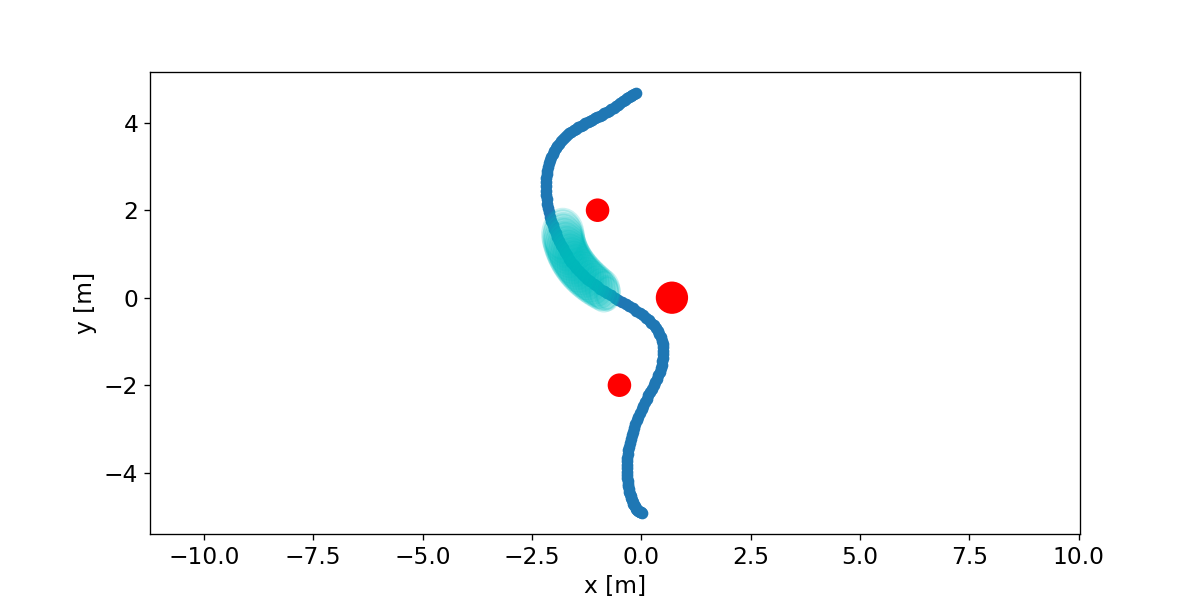

In [97]:
%matplotlib notebook
name = None
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.scatter(x[305:465],y[305:465])
obst1 = plt.Circle((-0.5, -2), 0.25, color='r')
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, color='r')
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, color='r')
ax.add_patch(obst3)
it = 385 #365
for i in range(ell_x.shape[1]):
    ellipse = Ellipse(xy=(ell_x[it,i], ell_y[it,i]), width=scale_x[it,i], height=scale_y[it,i], angle = 0, edgecolor='c', fc='c', lw=2, alpha=0.2)
    ax.add_patch(ellipse)
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

<IPython.core.display.Javascript object>


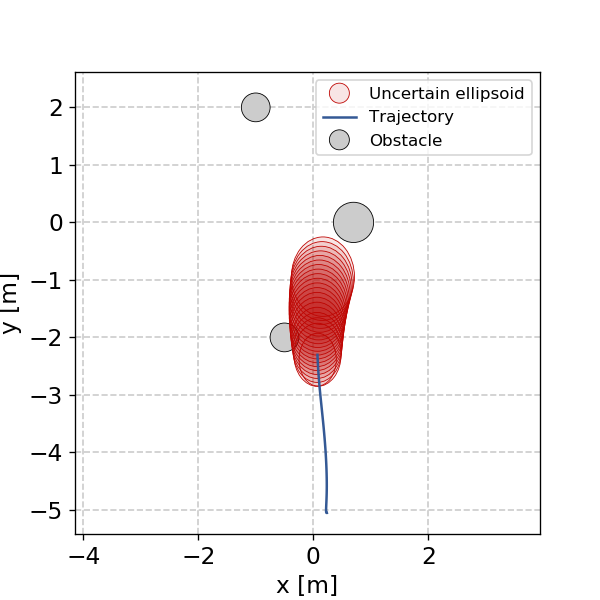

In [99]:
## %matplotlib notebook
name = '/home/johanna/thesis_plots/forces_crash'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.grid(color='0.8', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
x0, = ax.plot(x[640:],y[640:], color=(52/255,  89/255, 149/255))
obst1 = plt.Circle((-0.5, -2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst3)
it = 680 #365
ellipse0 = Ellipse(xy=(ell_x[it,0], ell_y[it,0]), width=1.2*scale_x[it,0], height=1.2*scale_y[it,0], angle = 0, edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
ax.add_patch(ellipse0)
for i in range(ell_x.shape[1]-1):
    ellipse = Ellipse(xy=(ell_x[it,i+1], ell_y[it,i+1]), width=1.2*scale_x[it,i+1], height=1.2*scale_y[it,i+1], angle = 0, edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
    ax.add_patch(ellipse)
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.axis('equal')
plt.legend([ellipse0, x0, obst1], ["Uncertain ellipsoid", "Trajectory", "Obstacle"],
          handler_map={plt.Circle: HandlerEllipse(), Ellipse: HandlerEllipse()})
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

## X field

In [80]:
from matplotlib.legend_handler import HandlerPatch


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = Ellipse(xy=center, width=12,
                             height=12)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

In [81]:
x_path = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data_x/x_path_mat.csv')
y_path = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data_x/y_path_mat.csv')
x_path = x_path.to_numpy()
y_path = y_path.to_numpy()
for i in range(y_path.shape[0]):
    for j in range(y_path.shape[1]):
        if y_path[i,j] < 1e-5 and y_path[i,j] > -1e-5:
            x_path[i,j] = float('nan')
            y_path[i,j] = float('nan')

In [82]:
x = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data_x/x.csv')
y = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data_x/y.csv')
x = np.array(x)
y = np.array(y)

<IPython.core.display.Javascript object>


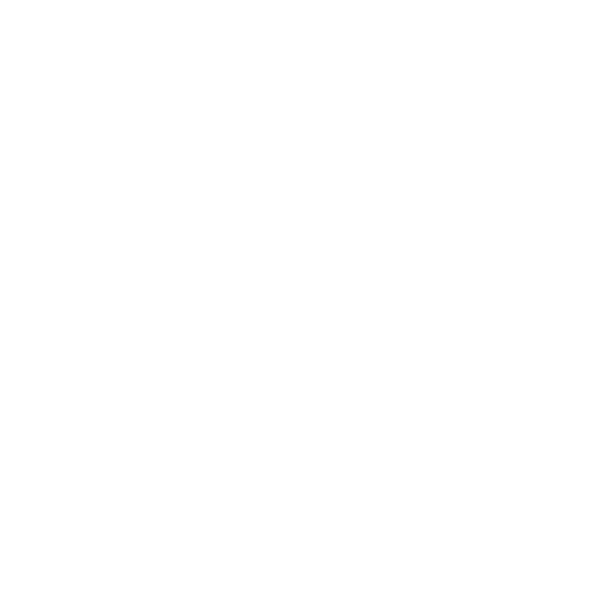

In [83]:
%matplotlib notebook
name = '/home/johanna/thesis_plots/forces_x_f_path'
fig, ax = plt.subplots()
ax.set_axisbelow(True)
fig.set_size_inches(5,5)

plt.grid(color='0.8', linestyle='--', linewidth=1)
x0 = ax.scatter(x[280:433],y[280:433], s=325, edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
obst1 = plt.Circle((-0.5, -2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst3)
x1, = ax.plot(x_path[32,:], y_path[32,:], '--', color=(19/255,138/255,54/255, 0.6), label='Planned trajectory')
x2, = ax.plot(x_path[32,0], y_path[32,0], 'x', color='k', label='Trajectory start')
for j in range(33,46): #46
    plt.plot(x_path[j,:], y_path[j,:], '--', color=(19/255,138/255,54/255, 0.6), label='Planned trajectory')
    plt.plot(x_path[j,0], y_path[j,0], 'x', color='k')
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
plt.legend([x0, x1, x2, obst1], ["Quadrotor radius", "Planned trajectory", "Trajectory start", "Obstacle"],
          handler_map={plt.Circle: HandlerEllipse()})
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

<IPython.core.display.Javascript object>


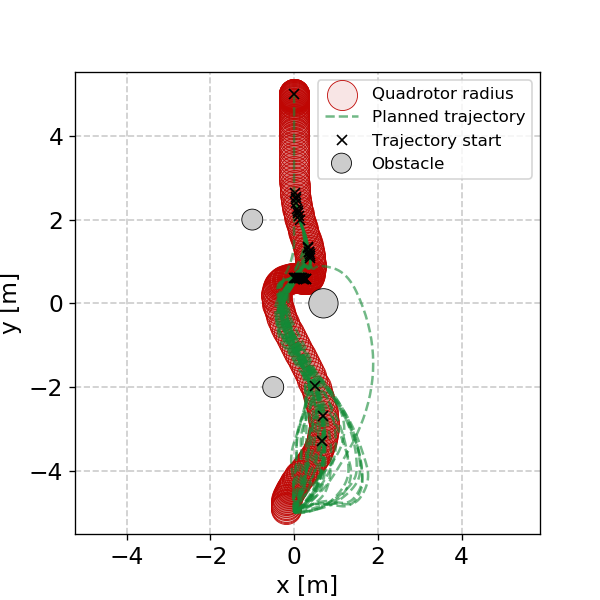

In [84]:
%matplotlib notebook
name = '/home/johanna/thesis_plots/forces_x_r_path'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.set_axisbelow(True)
plt.grid(color='0.8', linestyle='--', linewidth=1)
x0 = ax.scatter(x[434:630],y[434:630], s=325, edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5, label='Quadrotor radius')
obst1 = plt.Circle((-0.5, -2), 0.25, edgecolor='k', fc='0.8', lw=0.5, label='Obstacle')
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst3)
x1, = ax.plot(x_path[47,:], y_path[47,:], '--', color=(19/255,138/255,54/255, 0.6), label='Planned trajectory')
x2, = ax.plot(x_path[47,0], y_path[47,0], 'x', color='k', label='Trajectory start')
for j in range(48,81): #46
    ax.plot(x_path[j,:], y_path[j,:], '--', color=(19/255,138/255,54/255, 0.6))
    ax.plot(x_path[j,0], y_path[j,0], 'x', color='k')
plt.xlim([-3,3])
plt.ylim([-6,9])
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
#plt.legend(ncol=1, frameon=False)
plt.legend([x0, x1, x2, obst1], ["Quadrotor radius", "Planned trajectory", "Trajectory start", "Obstacle"],
          handler_map={plt.Circle: HandlerEllipse()})
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

In [85]:
ell_x = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data_x/x_pos_ell.csv')
ell_y = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data_x/y_pos_ell.csv')
ell_x = np.array(ell_x)
ell_y = np.array(ell_y)
scale_x = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data_x/x_scale_ell.csv')
scale_y = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/forces_data_x/y_scale_ell.csv')
scale_x = np.array(scale_x)
scale_y = np.array(scale_y)

<IPython.core.display.Javascript object>


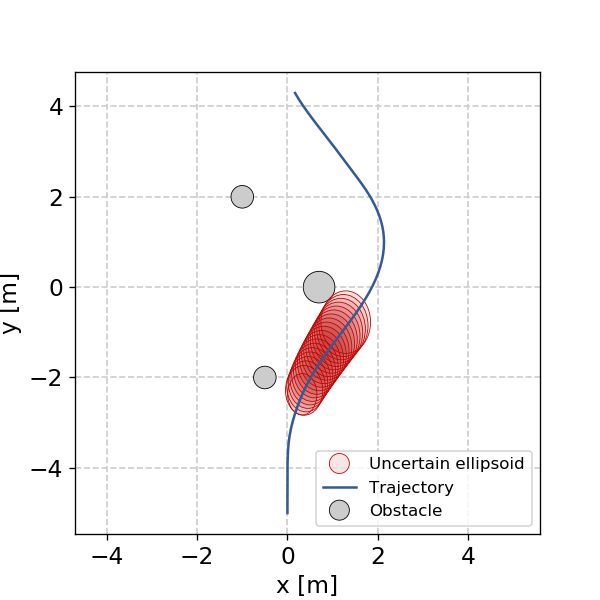

In [86]:
## %matplotlib notebook
name = '/home/johanna/thesis_plots/forces_x_f_ellipse'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.grid(color='0.8', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
x0, = ax.plot(x[280:433],y[280:433], color=(52/255,  89/255, 149/255))
obst1 = plt.Circle((-0.5, -2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst3)
it = 332 #365
ellipse0 = Ellipse(xy=(ell_x[it,0], ell_y[it,0]), width=1.2*scale_x[it,0], height=1.2*scale_y[it,0], angle = 0, edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
ax.add_patch(ellipse0)
for i in range(ell_x.shape[1]-1):
    ellipse = Ellipse(xy=(ell_x[it,i+1], ell_y[it,i+1]), width=1.2*scale_x[it,i+1], height=1.2*scale_y[it,i+1], angle = 0, edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
    ax.add_patch(ellipse)
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.axis('equal')
plt.legend([ellipse0, x0, obst1], ["Uncertain ellipsoid", "Trajectory", "Obstacle"],
          handler_map={plt.Circle: HandlerEllipse(), Ellipse: HandlerEllipse()})
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

<IPython.core.display.Javascript object>


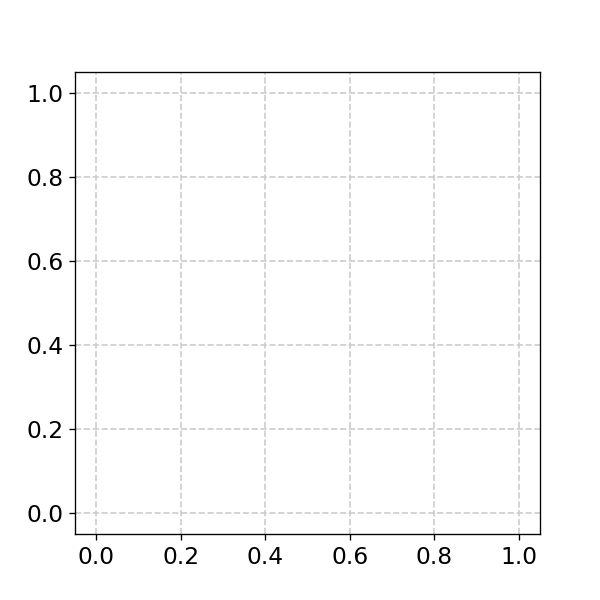

ValueError: too many values to unpack (expected 1)

In [110]:
## %matplotlib notebook
name = '/home/johanna/thesis_plots/forces_x_r_ellipse'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.grid(color='0.8', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
x0, = ax.plot(x[434:630],y[434:630], color=(52/255,  89/255, 149/255))
obst1 = plt.Circle((-0.5, -2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst3)
it = 497 #365
ellipse0 = Ellipse(xy=(ell_x[it,0], ell_y[it,0]), width=1.2*scale_x[it,0], height=1.2*scale_y[it,0], angle = 0, edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
ax.add_patch(ellipse0)
for i in range(ell_x.shape[1]-1):
    ellipse = Ellipse(xy=(ell_x[it,i+1], ell_y[it,i+1]), width=1.2*scale_x[it,i+1], height=1.2*scale_y[it,i+1], angle = 0, edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
    ax.add_patch(ellipse)
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.axis('equal')
plt.legend([ellipse0, x0, obst1], ["Uncertain ellipsoid", "Trajectory", "Obstacle"],
          handler_map={plt.Circle: HandlerEllipse(), Ellipse: HandlerEllipse()})
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

## LMPCC 

In [119]:
x = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/lmpcc_data_x/x_mat.csv')
y = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/lmpcc_data_x/y_mat.csv')
x = np.array(x)
y = np.array(y)
sigma_x = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/lmpcc_data_x/sigma_x_mat.csv')
sigma_y = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/lmpcc_data_x/sigma_y_mat.csv')
sigma_xy = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/lmpcc_data_x/sigma_xy_mat.csv')
sigma_x = sigma_x.to_numpy()
sigma_y = sigma_y.to_numpy()
sigma_xy = sigma_xy.to_numpy()

<IPython.core.display.Javascript object>


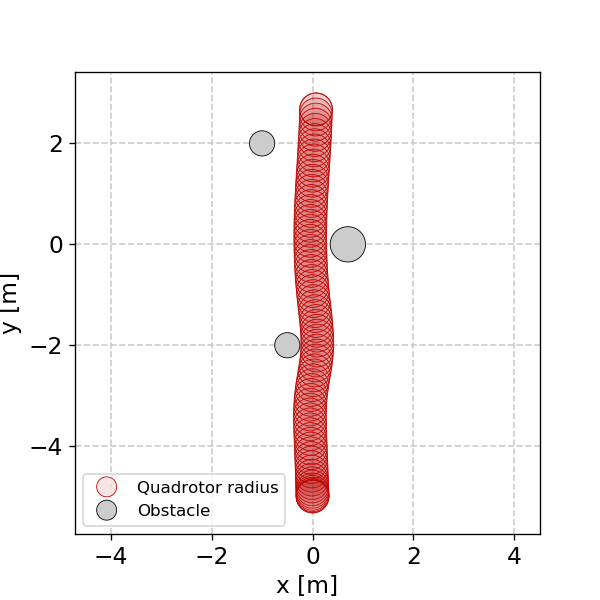

In [120]:
%matplotlib notebook
name = '/home/johanna/thesis_plots/lmpcc_x_f_path'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.set_axisbelow(True)
plt.grid(color='0.8', linestyle='--', linewidth=1)
ellipse0 = Ellipse(xy=(x[i,0], y[i,0]), width= 2*(0.325), height= 2*(0.325), angle =0,  edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
ax.add_patch(ellipse0)
for i in range(x.shape[0]):
    ellipse = Ellipse(xy=(x[i,0], y[i,0]), width= 2*(0.325), height= 2*(0.325), angle =0,  edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
    ax.add_patch(ellipse)
obst1 = plt.Circle((-0.5, -2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst3)
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
plt.legend([ellipse0, obst1], ["Quadrotor radius","Obstacle"],
          handler_map={plt.Circle: HandlerEllipse(), Ellipse: HandlerEllipse()})
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

<IPython.core.display.Javascript object>


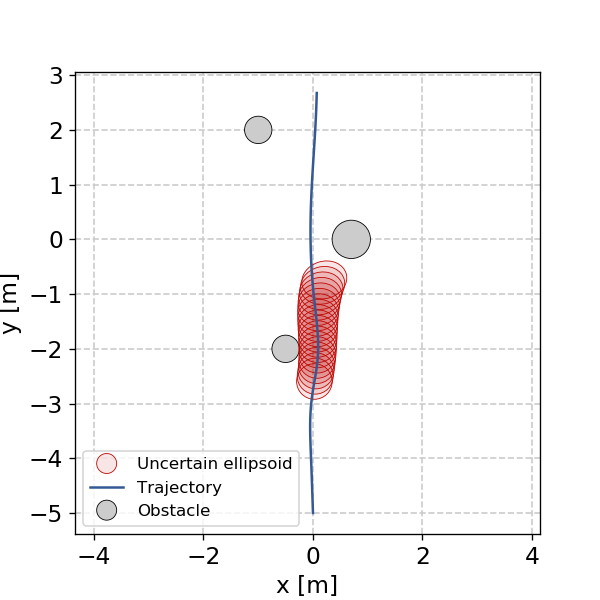

In [121]:
%matplotlib notebook
name = '/home/johanna/thesis_plots/lmpcc_x_f_ellipse'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.grid(color='0.8', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
x0, = ax.plot(x[:,0],y[:,0], color=(52/255,  89/255, 149/255))
obst1 = plt.Circle((-0.5, -2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst3)
it = 30
chi = 5.991
for i in range(ell_x.shape[1]):
    variance_x =  sigma_x[it,i]
    variance_y =  sigma_y[it,i]
    variance_xy =  sigma_xy[it,i]
    l_1 = (variance_x + variance_y)/2 + np.sqrt(((variance_x - variance_y)/2)**2 + variance_xy**2)
    l_2 = (variance_x + variance_y)/2 - np.sqrt(((variance_x - variance_y)/2)**2 + variance_xy**2)
    rot = computeEllipseRot(l_1, variance_x, variance_xy, variance_y)
    if i == 0:
        ellipse0 = Ellipse(xy=(x[it,i], y[it,i]), width= 2*(np.sqrt(chi*l_1)+0.325), height= 2*(np.sqrt(chi*l_2)+0.325), angle = rot*180/math.pi,  edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
        ax.add_patch(ellipse0)
    else:
        ellipse = Ellipse(xy=(x[it,i], y[it,i]), width= 2*(np.sqrt(chi*l_1)+0.325), height= 2*(np.sqrt(chi*l_2)+0.325), angle = rot*180/math.pi,  edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
        ax.add_patch(ellipse)
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
plt.legend([ellipse0, x0, obst1], ["Uncertain ellipsoid", "Trajectory", "Obstacle"],
          handler_map={plt.Circle: HandlerEllipse(), Ellipse: HandlerEllipse()})
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

In [122]:
x = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/lmpcc_data_x_r/x_mat.csv')
y = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/lmpcc_data_x_r/y_mat.csv')
x = np.array(x)
y = np.array(y)
sigma_x = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/lmpcc_data_x_r/sigma_x_mat.csv')
sigma_y = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/lmpcc_data_x_r/sigma_y_mat.csv')
sigma_xy = pd.read_csv('/home/johanna/MasterThesis/final_data/forces_data/lmpcc_data_x_r/sigma_xy_mat.csv')
sigma_x = sigma_x.to_numpy()
sigma_y = sigma_y.to_numpy()
sigma_xy = sigma_xy.to_numpy()

<IPython.core.display.Javascript object>


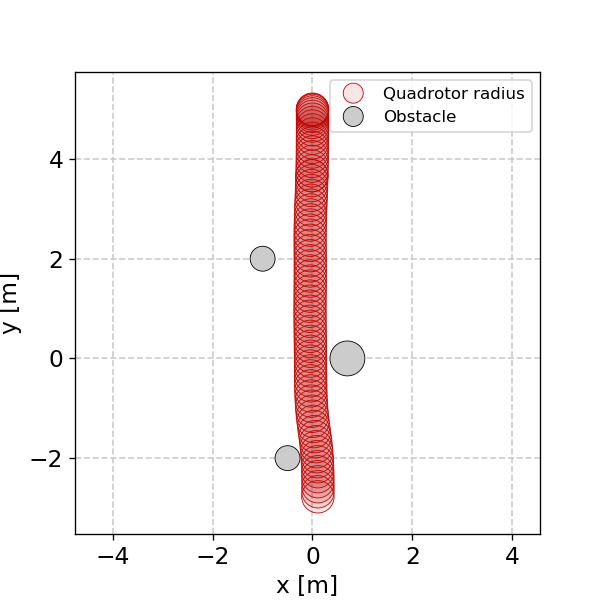

In [123]:
%matplotlib notebook
name = '/home/johanna/thesis_plots/lmpcc_x_r_path'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.set_axisbelow(True)
plt.grid(color='0.8', linestyle='--', linewidth=1)
ellipse0 = Ellipse(xy=(x[i,0], y[i,0]), width= 2*(0.325), height= 2*(0.325), angle =0,  edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
ax.add_patch(ellipse0)
for i in range(x.shape[0]):
    ellipse = Ellipse(xy=(x[i,0], y[i,0]), width= 2*(0.325), height= 2*(0.325), angle =0,  edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
    ax.add_patch(ellipse)
obst1 = plt.Circle((-0.5, -2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst3)
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
plt.legend([ellipse0, obst1], ["Quadrotor radius","Obstacle"],
      handler_map={plt.Circle: HandlerEllipse(), Ellipse: HandlerEllipse()})
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()

<IPython.core.display.Javascript object>


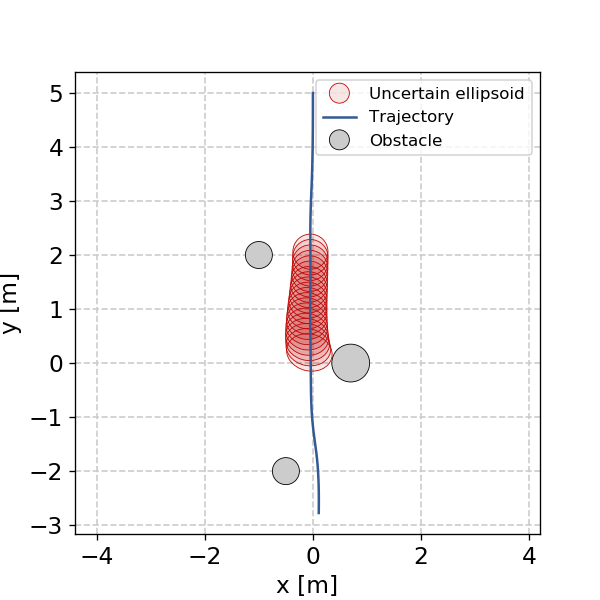

In [124]:
%matplotlib notebook
name = '/home/johanna/thesis_plots/lmpcc_x_r_ellipse'
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.grid(color='0.8', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.plot(x[:,0],y[:,0], color=(52/255,  89/255, 149/255))
obst1 = plt.Circle((-0.5, -2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst1)
obst2 = plt.Circle((0.7,0), 0.35, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst2)
obst3 = plt.Circle((-1,2), 0.25, edgecolor='k', fc='0.8', lw=0.5)
ax.add_patch(obst3)
it = 35
chi = 5.991
for i in range(ell_x.shape[1]):
    variance_x =  sigma_x[it,i]
    variance_y =  sigma_y[it,i]
    variance_xy =  sigma_xy[it,i]
    l_1 = (variance_x + variance_y)/2 + np.sqrt(((variance_x - variance_y)/2)**2 + variance_xy**2)
    l_2 = (variance_x + variance_y)/2 - np.sqrt(((variance_x - variance_y)/2)**2 + variance_xy**2)
    rot = computeEllipseRot(l_1, variance_x, variance_xy, variance_y)
    if i == 0:
        ellipse0 = Ellipse(xy=(x[it,i], y[it,i]), width= 2*(np.sqrt(chi*l_1)+0.325), height= 2*(np.sqrt(chi*l_2)+0.325), angle = rot*180/math.pi,  edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
        ax.add_patch(ellipse0)
    else:
        ellipse = Ellipse(xy=(x[it,i], y[it,i]), width= 2*(np.sqrt(chi*l_1)+0.325), height= 2*(np.sqrt(chi*l_2)+0.325), angle = rot*180/math.pi,  edgecolor=(191/255, 6/255,3/255, 1), fc=(191/255, 6/255,3/255, 0.1), lw=0.5)
        ax.add_patch(ellipse)
plt.xlim([-3,3])
plt.ylim([-6,6])
ax.set_aspect('equal')
plt.xlabel('x [m]', fontsize=14)
plt.ylabel('y [m]', fontsize=14)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.axis('equal')
plt.legend([ellipse0, x0, obst1], ["Uncertain ellipsoid", "Trajectory", "Obstacle"],
          handler_map={plt.Circle: HandlerEllipse(), Ellipse: HandlerEllipse()})
if not name==None:
    plt.savefig(name,  bbox_inches="tight")
plt.show()